In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

import itertools

from tqdm import tqdm

data_dir="/kaggle/input/titanic"

# Load data

In [2]:
df_train = pd.read_csv(f"{data_dir}/train.csv")
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)
df_test = pd.read_csv(f"{data_dir}/test.csv")

display(df_train)
display(df_val)
display(df_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Check basic info

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Features

## Name
Extract Title Information from Name - gives insights into Age & Gender

In [5]:
df_train["Title"] = df_train.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
df_val["Title"] = df_val.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
df_test["Title"] = df_test.Name.str.extract(" ([A-Za-z]+)\.", expand=False)

df_train["Title"].unique()

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms', 'Countess', 'Lady'], dtype=object)

In [6]:
# Unknown = 0
# Master = 1
# Miss = 2
# Mr = 3
# Mrs = 4
# Rojalty = 5
# Officer = 6


title_mapping = { \
    "Master" : 1, \
    "Miss" : 2, \
    "Mlle": 2, \
    "Mr" : 3, \
    "Mrs" : 4, \
    "Mme": 4, \
    "Ms": 4, \
    "Rev": 5, \
    "Dr": 5, \
    "Countess": 5, \
    "Lady" : 5, \
    "Col": 6, \
    "Capt": 6, \
    "Major": 6, \
    "Unknown": 0
}

df_train[~df_train["Title"].isin(list(title_mapping.keys()))]
df_val.loc[~df_val["Title"].isin(list(title_mapping.keys())), "Title"] = "Unknown"
df_test.loc[~df_test["Title"].isin(list(title_mapping.keys())), "Title"] = "Unknown"

df_train["Title"] = df_train["Title"].map( title_mapping ).astype(int)
df_val["Title"] = df_val["Title"].map( title_mapping ).astype(int)
df_test["Title"] = df_test["Title"].map( title_mapping ).astype(int)

3    419
2    145
4     98
1     33
5     12
6      5
Name: Title, dtype: int64

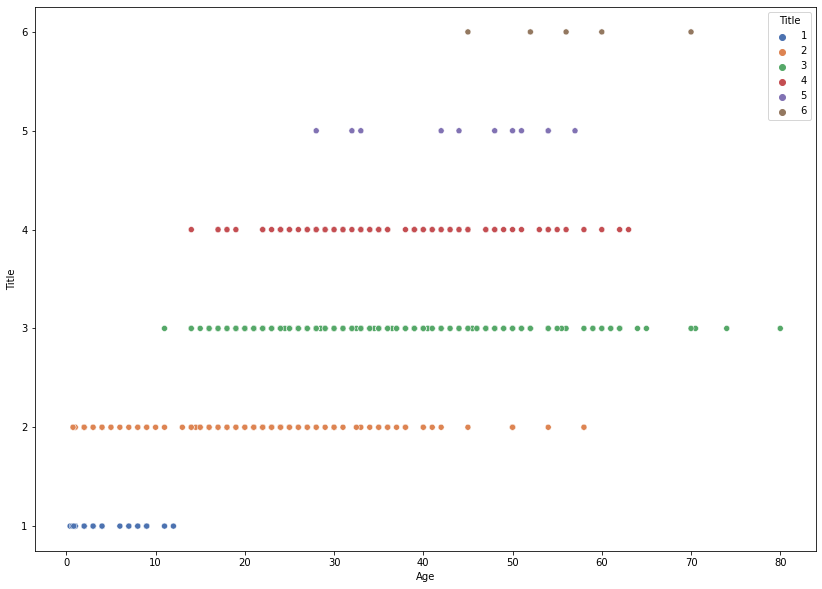

In [7]:
plt.figure(figsize = (14,10))

sns.scatterplot(data=df_train, x="Age", y="Title", hue="Title", palette="deep")

df_train["Title"].value_counts()

## Age

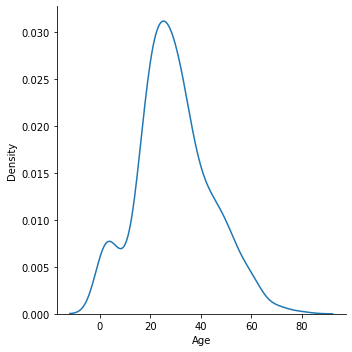

In [8]:
sns.displot(df_train, x="Age", kind="kde")

Impute missing Age values based on information from Pclass, Sex, Title from train set

In [9]:
df_train.groupby(['Pclass','Sex', "Title"])['Age'].median().to_frame()

Age
Pclass Sex    Title       
1      female 2      30.00
              4      39.00
              5      40.50
       male   1       2.46
              3      38.50
              5      44.00
              6      56.00
2      female 2      24.00
              4      30.50
       male   1       1.50
              3      30.00
              5      52.50
3      female 2      18.00
              4      31.00
       male   1       4.00
              3      27.00

In [10]:
display(df_train[(df_train["Pclass"] == 1) & (df_train["Sex"] == "female") & (df_train["Age"].isnull())])
display(df_train[(df_train["Pclass"] == 2) & (df_train["Sex"] == "male") & (df_train["Age"].isnull())])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.65,NaN,S,4
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C,4
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.00,E33,S,4


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C,3
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,3
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S,3
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,3
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S,3
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,3
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,3
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,3


In [11]:
def impute_age(df):
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "female") & (df["Title"] == 2) & (df["Age"].isnull()), "Age"] = 30
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "female") & (df["Title"] == 4) & (df["Age"].isnull()), "Age"] = 39
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "female") & (df["Title"] == 5) & (df["Age"].isnull()), "Age"] = 40.5
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "male") & (df["Title"] == 1) & (df["Age"].isnull()), "Age"] = 2.46
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "male") & (df["Title"] == 3) & (df["Age"].isnull()), "Age"] = 38.5
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "male") & (df["Title"] == 5) & (df["Age"].isnull()), "Age"] = 44
    df.loc[(df["Pclass"] == 1) & (df["Sex"] == "male") & (df["Title"] == 6) & (df["Age"].isnull()), "Age"] = 56
    
    df.loc[(df["Pclass"] == 2) & (df["Sex"] == "female") & (df["Title"] == 2) & (df["Age"].isnull()), "Age"] = 24
    df.loc[(df["Pclass"] == 2) & (df["Sex"] == "female") & (df["Title"] == 4) & (df["Age"].isnull()), "Age"] = 30.5
    df.loc[(df["Pclass"] == 2) & (df["Sex"] == "male") & (df["Title"] == 1) & (df["Age"].isnull()), "Age"] = 1.5
    df.loc[(df["Pclass"] == 2) & (df["Sex"] == "male") & (df["Title"] == 3) & (df["Age"].isnull()), "Age"] = 30
    df.loc[(df["Pclass"] == 2) & (df["Sex"] == "male") & (df["Title"] == 5) & (df["Age"].isnull()), "Age"] = 52.5
    
    df.loc[(df["Pclass"] == 3) & (df["Sex"] == "female") & (df["Title"] == 2) & (df["Age"].isnull()), "Age"] = 18
    df.loc[(df["Pclass"] == 3) & (df["Sex"] == "female") & (df["Title"] == 4) & (df["Age"].isnull()), "Age"] = 31
    df.loc[(df["Pclass"] == 3) & (df["Sex"] == "male") & (df["Title"] == 1) & (df["Age"].isnull()), "Age"] = 4
    df.loc[(df["Pclass"] == 3) & (df["Sex"] == "male") & (df["Title"] == 3) & (df["Age"].isnull()), "Age"] = 27
    
    return df

df_train = impute_age(df_train)
df_val = impute_age(df_val)
df_test = impute_age(df_test)

In [12]:
df_train.loc[[256, 166, 2, 1, 466, 732]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,39.0,0,0,PC 17585,79.2000,NaN,C,4
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,39.0,0,1,113505,55.0000,E33,S,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
466,467,0,2,"Campbell, Mr. William",male,30.0,0,0,239853,0.0000,NaN,S,3
732,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,239855,0.0000,NaN,S,3


In [13]:
print(df_train["Age"].isnull().sum())
print(df_val["Age"].isnull().sum())
print(df_test["Age"].isnull().sum())


0
0
0


In [14]:
# Discretize Age into groups

# * 0 Baby        0 - 3
# * 1 Child       3 - 13
# * 2 Teenager   13 - 19
# * 3 Grown Up   19 - 29
# * 4 Adult      29 - 45
# * 5 Aging      45 - 60
# * 6 Aged       60 - inf

age_bins = [0, 3, 13, 19, 29, 45, 60, np.inf]

df_train["Age"] = pd.cut(df_train["Age"], bins=age_bins, labels=False)
df_val["Age"] = pd.cut(df_val["Age"], bins=age_bins, labels=False)
df_test["Age"] = pd.cut(df_test["Age"], bins=age_bins, labels=False)

<AxesSubplot:xlabel='Age', ylabel='count'>

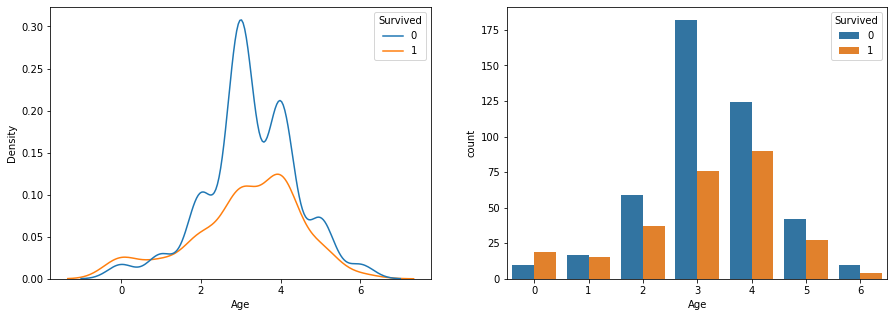

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_train, x="Age", hue="Survived", ax=axs[0])
sns.countplot(data=df_train, x="Age", hue="Survived", ax=axs[1])

## Fare
Discretize Fare into 5 equally big groups

In [16]:
fare_bins = pd.qcut(df_train["Fare"], 5, retbins=True)[1]
fare_bins[0] = -np.inf
fare_bins[-1] = np.inf
fare_bins

array([    -inf,  7.88916, 10.5    , 21.045  , 39.6875 ,      inf])

In [17]:
df_train["Fare"] = pd.cut(df_train["Fare"], bins=fare_bins, labels=False)
df_val["Fare"] = pd.cut(df_val["Fare"], bins=fare_bins, labels=False)
df_test["Fare"] = pd.cut(df_test["Fare"], bins=fare_bins, labels=False)

<AxesSubplot:xlabel='Fare', ylabel='count'>

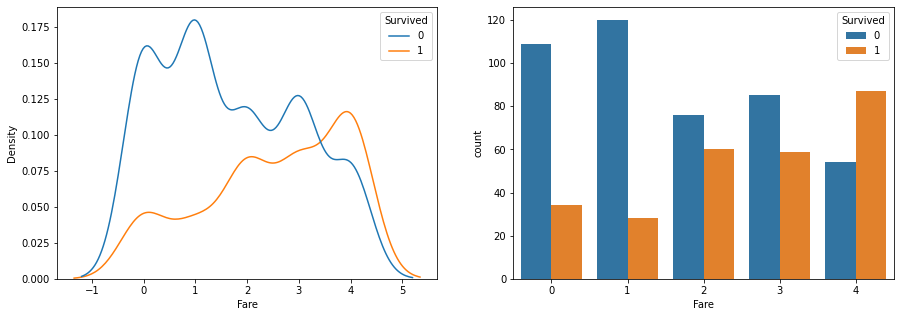

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df_train, x="Fare", hue="Survived", ax=axs[0])
sns.countplot(data=df_train, x="Fare", hue="Survived", ax=axs[1])

## Sex Encoding
Encode Sex Labels

In [19]:
df_train["Sex"] = df_train["Sex"].map( {'female': 1, 'male': 0} ).astype(int)
df_val["Sex"] = df_val["Sex"].map( {'female': 1, 'male': 0} ).astype(int)
df_test["Sex"] = df_test["Sex"].map( {'female': 1, 'male': 0} ).astype(int)

<AxesSubplot:xlabel='Sex', ylabel='count'>

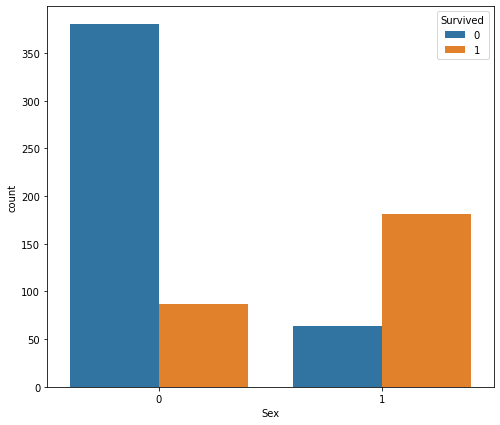

In [20]:
plt.figure(figsize=(8,7))
sns.countplot(data=df_train, x="Sex", hue="Survived")

## Embarked
Fill missing embarked values with 'S' port and encode Embarked Labels

In [21]:
df_train.groupby("Embarked").count()["PassengerId"].reset_index().rename(columns={"PassengerId": "embark_count"})

,Embarked,embark_count
0,C,125
1,Q,60
2,S,525


In [22]:
df_train = df_train.fillna({"Embarked": "S"})
df_val = df_val.fillna({"Embarked": "S"})
df_test = df_test.fillna({"Embarked": "S"})

df_train["Embarked"] = df_train["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_val["Embarked"] = df_val["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_test["Embarked"] = df_test["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

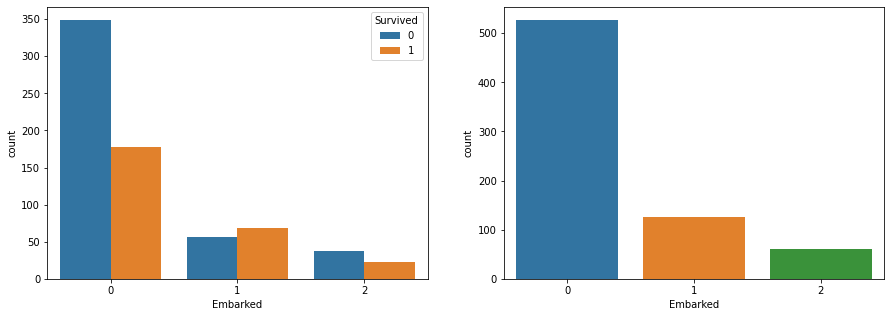

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df_train, x="Embarked", hue="Survived", ax=axs[0])
sns.countplot(data=df_train, x="Embarked", ax=axs[1])

## Remove Ticket, Name, Cabin

In [24]:
df_train = df_train.drop(["Ticket", "Name", "Cabin"], axis=1)
df_val = df_val.drop(["Ticket", "Name", "Cabin"], axis=1)
df_test = df_test.drop(["Ticket", "Name", "Cabin"], axis=1)

## Add FamilySize Feature
Add familysize feature based upon SibSp and Parch features

In [25]:
df_train["family_size"] = df_train["SibSp"] + df_train["Parch"] + 1
df_val["family_size"] = df_val["SibSp"] + df_val["Parch"] + 1
df_test["family_size"] = df_test["SibSp"] + df_test["Parch"] + 1

<AxesSubplot:xlabel='family_size', ylabel='count'>

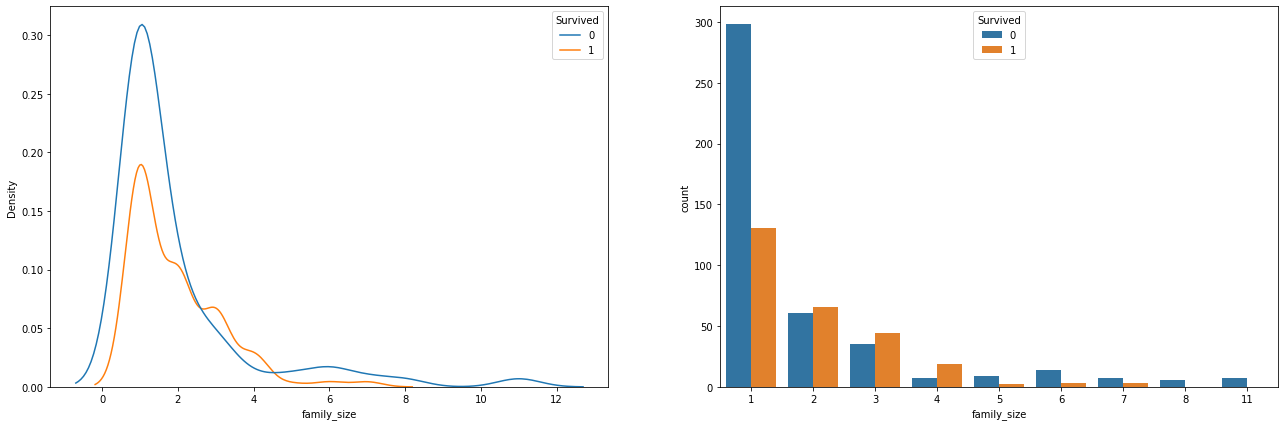

In [26]:
fig, axs = plt.subplots(1,2, figsize=(22,7))
sns.kdeplot(data=df_train, x="family_size", hue="Survived", ax=axs[0])
sns.countplot(data=df_train, x="family_size", hue="Survived", ax=axs[1])

# Final data check
Check if there are any missing values, or non encoded features

In [27]:
display(df_train)
display(df_train.info())

display(df_val)
display(df_val.info())


display(df_test)
display(df_test.info())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
331,332,0,1,0,5,0,0,3,0,3,1
733,734,0,2,0,3,0,0,2,0,3,1
382,383,0,3,0,4,0,0,1,0,3,1
704,705,0,3,0,3,1,0,0,0,3,2
813,814,0,3,1,1,4,2,3,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,1,3,0,0,0,0,2,1
270,271,0,1,0,4,0,0,3,0,3,1
860,861,0,3,0,4,2,0,2,0,3,3
435,436,1,1,1,2,1,2,4,0,2,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  712 non-null    int64
 1   Survived     712 non-null    int64
 2   Pclass       712 non-null    int64
 3   Sex          712 non-null    int64
 4   Age          712 non-null    int64
 5   SibSp        712 non-null    int64
 6   Parch        712 non-null    int64
 7   Fare         712 non-null    int64
 8   Embarked     712 non-null    int64
 9   Title        712 non-null    int64
 10  family_size  712 non-null    int64
dtypes: int64(11)
memory usage: 82.9 KB


None

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
709,710,1,3,0,1,1,1,2,1,1,3
439,440,0,2,0,4,0,0,1,0,3,1
840,841,0,3,0,3,0,0,1,0,3,1
720,721,1,2,1,1,0,1,3,0,2,2
39,40,1,3,1,2,1,0,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
433,434,0,3,0,2,0,0,0,0,3,1
773,774,0,3,0,3,0,0,0,1,3,1
25,26,1,3,1,4,1,5,3,0,4,7
84,85,1,2,1,2,0,0,1,0,2,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  179 non-null    int64
 1   Survived     179 non-null    int64
 2   Pclass       179 non-null    int64
 3   Sex          179 non-null    int64
 4   Age          179 non-null    int64
 5   SibSp        179 non-null    int64
 6   Parch        179 non-null    int64
 7   Fare         179 non-null    int64
 8   Embarked     179 non-null    int64
 9   Title        179 non-null    int64
 10  family_size  179 non-null    int64
dtypes: int64(11)
memory usage: 16.8 KB


None

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
0,892,3,0,4,0,0,0.0,2,3,1
1,893,3,1,5,1,0,0.0,0,4,2
2,894,2,0,6,0,0,1.0,2,3,1
3,895,3,0,3,0,0,1.0,0,3,1
4,896,3,1,3,1,1,2.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3,0,0,1.0,0,3,1
414,1306,1,1,4,0,0,4.0,1,0,1
415,1307,3,0,4,0,0,0.0,0,3,1
416,1308,3,0,3,0,0,1.0,0,3,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
 9   family_size  418 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 32.8 KB


None

## Fill missing Fare in test set

In [28]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family_size
152,1044,3,0,6,0,0,NaN,0,3,1


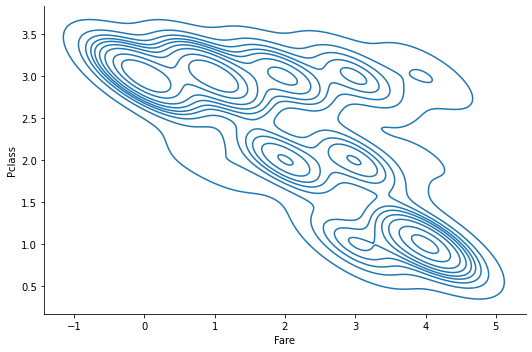

In [29]:
sns.displot(df_train, x="Fare", y="Pclass", kind="kde", aspect=1.5)

In [30]:
print(f"Mean: {df_train['Fare'].mean()}")
print(f"Median: {df_train['Fare'].median()}")
print(f"Mode: {df_train['Fare'].mode()[0]}")

Mean: 1.9887640449438202
Median: 2.0
Mode: 1


In [31]:
display(df_train.groupby(["Pclass"])["Fare"].median().to_frame())
pclass_3_median_train_fare = df_train.groupby(["Pclass"])["Fare"].median().to_frame().values[2][0]
print(pclass_3_median_train_fare)

,Fare
Pclass,
1,4.0
2,2.0
3,1.0


1.0


In [32]:
df_test = df_test.fillna({"Fare": pclass_3_median_train_fare}) # Fill up missing test Fare value with median of train data

In [33]:
df_train['Survived'].value_counts().to_frame()

,Survived
0,444
1,268


<AxesSubplot:>

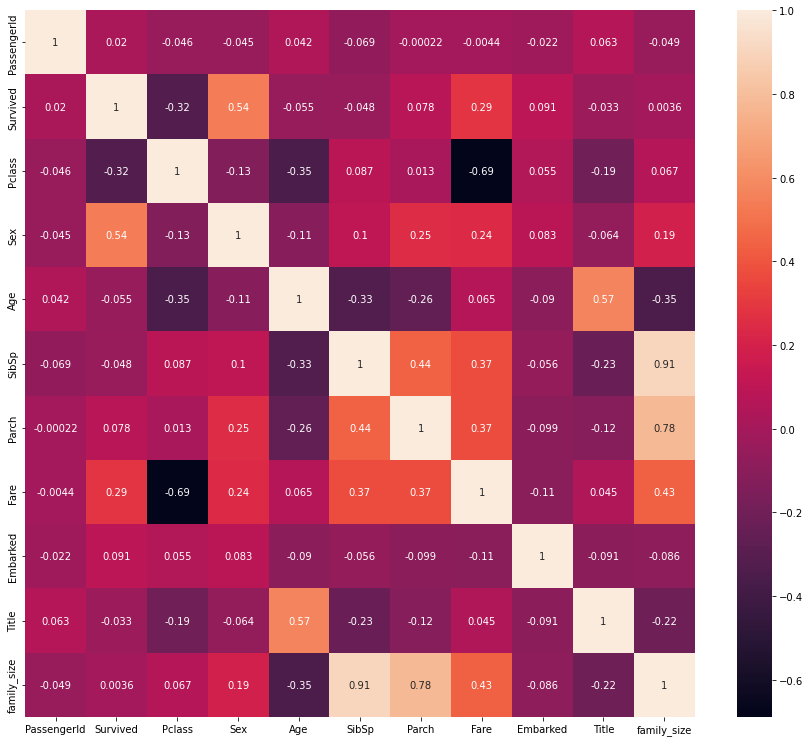

In [34]:
plt.figure(figsize = (15,13))

sns.heatmap(df_train.corr(), annot=True)

# Data Split in train, val, test

In [35]:
x_train = df_train.drop(["PassengerId", "Survived", "Embarked"], axis=1)
y_train = df_train["Survived"].to_frame()

print("****************************** TRAIN DATA ***************************\n")
display(x_train)
display(x_train.describe())
display(y_train)


x_val = df_val.drop(["PassengerId", "Survived", "Embarked"], axis=1)
y_val = df_val["Survived"].to_frame()

print("\n\n****************************** VAL DATA ***************************\n")
display(x_val)
display(x_val.describe())
display(y_val)


x_test = df_test.drop(["PassengerId", "Embarked"], axis=1)
x_passenger_ids = df_test["PassengerId"].to_frame()

print("\n\n****************************** TEST DATA ***************************\n")
display(x_test)
display(x_test.describe())
display(x_passenger_ids)


****************************** TRAIN DATA ***************************



,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
331,1,0,5,0,0,3,3,1
733,2,0,3,0,0,2,3,1
382,3,0,4,0,0,1,3,1
704,3,0,3,1,0,0,3,2
813,3,1,1,4,2,3,2,7
...,...,...,...,...,...,...,...,...
106,3,1,3,0,0,0,2,1
270,1,0,4,0,0,3,3,1
860,3,0,4,2,0,2,3,3
435,1,1,2,1,2,4,2,4


,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,0.344101,3.206461,0.553371,0.379213,1.988764,2.896067,1.932584
std,0.824584,0.475408,1.227126,1.176404,0.791669,1.417149,0.804618,1.682525
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2.750000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,3.000000,1.000000
75%,3.000000,1.000000,4.000000,1.000000,0.000000,3.000000,3.000000,2.000000
max,3.000000,1.000000,6.000000,8.000000,6.000000,4.000000,6.000000,11.000000


,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1




****************************** VAL DATA ***************************



,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
709,3,0,1,1,1,2,1,3
439,2,0,4,0,0,1,3,1
840,3,0,3,0,0,1,3,1
720,2,1,1,0,1,3,2,2
39,3,1,2,1,0,2,2,2
...,...,...,...,...,...,...,...,...
433,3,0,2,0,0,0,3,1
773,3,0,3,0,0,0,3,1
25,3,1,4,1,5,3,4,7
84,2,1,2,0,0,1,2,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.223464,0.385475,3.279330,0.402235,0.391061,1.983240,2.849162,1.793296
std,0.877501,0.488073,1.204004,0.730703,0.863185,1.459086,0.857640,1.301149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,3.000000,1.000000
75%,3.000000,1.000000,4.000000,1.000000,0.000000,3.000000,3.000000,2.000000
max,3.000000,1.000000,6.000000,4.000000,5.000000,4.000000,5.000000,7.000000


,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1




****************************** TEST DATA ***************************



,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
0,3,0,4,0,0,0.0,3,1
1,3,1,5,1,0,0.0,4,2
2,2,0,6,0,0,1.0,3,1
3,3,0,3,0,0,1.0,3,1
4,3,1,3,1,1,2.0,4,3
...,...,...,...,...,...,...,...,...
413,3,0,3,0,0,1.0,3,1
414,1,1,4,0,0,4.0,0,1
415,3,0,4,0,0,0.0,3,1
416,3,0,3,0,0,1.0,3,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Title,family_size
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,3.263158,0.447368,0.392344,1.966507,2.909091,1.839713
std,0.841838,0.481622,1.180429,0.896760,0.981429,1.475240,0.805475,1.519072
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,3.000000,1.000000
75%,3.000000,1.000000,4.000000,1.000000,0.000000,3.000000,3.000000,2.000000
max,3.000000,1.000000,6.000000,8.000000,9.000000,4.000000,6.000000,11.000000


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


# PCA

Explained variance ration: [0.37679786 0.24955896]


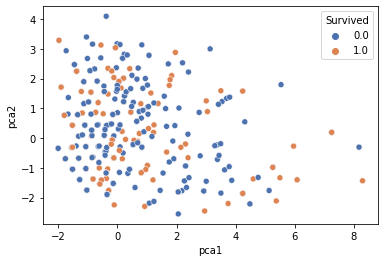

In [36]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(StandardScaler().fit_transform(x_train, y_train))

principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

finalPrincipalDf = pd.concat([principalDf, y_train[['Survived']]], axis = 1)

sns.scatterplot(data=finalPrincipalDf, x="pca1", y="pca2", hue="Survived", palette="deep")
print(f"Explained variance ration: {pca.explained_variance_ratio_}")

In [37]:
def grid_search(model, params, x_train, y_train):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    cv = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)
    cv.fit(x_train.to_numpy(), y_train.values.ravel())
    
    model = cv.best_estimator_[1]
    score = cv.best_score_
    
    print(f"Training: {score:.4f} {model}")
    
    return score, model

def evaluate(model, x_train, y_train, x_val, y_val):    
    scaler = StandardScaler().fit(x_train, y_train)
    
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
        
    model = model.fit(x_train, y_train.values.ravel())
    score = model.score(x_val, y_val.values.ravel())
    
    print(f"Evaluation: {score:.4f} {model}")
    
    return score, model

def get_test_predictions(model, x_train, y_train, x_test):    
    scaler = StandardScaler().fit(x_train, y_train)
    
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    model = model.fit(x_train, y_train.values.ravel())
    
    return model.predict(x_test)

def confusion_matrix(model, x_train, y_train, x_val, y_val):    
    scaler = StandardScaler().fit(x_train, y_train)
    
    x_train = scaler.transform(x_train)
    x_val = scaler.transform(x_val)
    
    model = model.fit(x_train, y_train.values.ravel())
    
    ConfusionMatrixDisplay.from_estimator(model, x_val, y_val)

# Predict

## Baseline

In [38]:
train_score, model = grid_search(DummyClassifier(random_state=42), {}, x_train, y_train)
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training: 0.6236 DummyClassifier(random_state=42)
Evaluation: 0.5866 DummyClassifier(random_state=42)


In [39]:
models = []

## KNN

In [40]:
param_grid = {
    'model__n_neighbors': np.arange(1, 70, 1),
    'model__weights': ["uniform", "distance"]
}

train_score, model = grid_search(KNeighborsClassifier(), param_grid, x_train, y_train)

Fitting 5 folds for each of 138 candidates, totalling 690 fits
Training: 0.8413 KNeighborsClassifier(n_neighbors=26)


Evaluation: 0.8156 KNeighborsClassifier(n_neighbors=26)


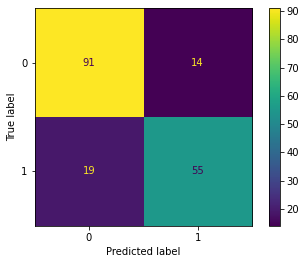

In [41]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [42]:
models.append({
    "type": "KNN",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## Random Forest

In [43]:
param_grid = {
    'model__max_depth': np.arange(2, 10, 1),
    'model__n_estimators': np.arange(5, 61, 1)
}

train_score, model = grid_search(RandomForestClassifier(random_state=42), param_grid, x_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
Training: 0.8399 RandomForestClassifier(max_depth=4, n_estimators=30, random_state=42)


Evaluation: 0.8212 RandomForestClassifier(max_depth=4, n_estimators=30, random_state=42)


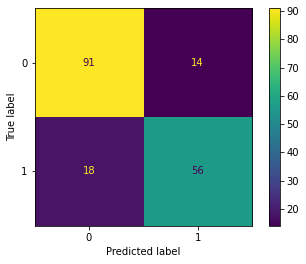

In [44]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [45]:
models.append({
    "type": "RandomForest",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## Logistic Regression

In [46]:
param_grid = {
    'model__C': np.arange(0.001, 0.1, 0.001)
}

train_score, model = grid_search(LogisticRegression(random_state=42), param_grid, x_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Training: 0.7935 LogisticRegression(C=0.010000000000000002, random_state=42)


Evaluation: 0.8156 LogisticRegression(C=0.010000000000000002, random_state=42)


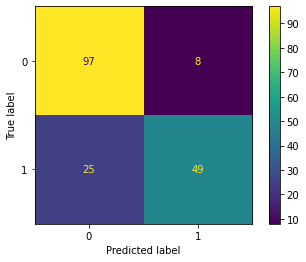

In [47]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [48]:
models.append({
    "type": "LogisticRegression",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## GradientBoostingClassifier

In [49]:
param_grid = {
    'model__learning_rate': np.arange(0.25, 0.9, 0.1),
    'model__n_estimators': np.arange(1, 25, 1),
    'model__max_depth': np.arange(1, 6, 1)
}

train_score, model = grid_search(GradientBoostingClassifier(random_state=42), param_grid, x_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits
Training: 0.8385 GradientBoostingClassifier(learning_rate=0.5499999999999999, n_estimators=9,
                           random_state=42)


Evaluation: 0.8212 GradientBoostingClassifier(learning_rate=0.5499999999999999, n_estimators=9,
                           random_state=42)


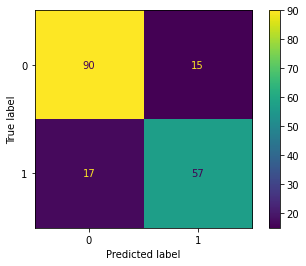

In [50]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [51]:
models.append({
    "type": "GradientBoosting",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## SVM

In [52]:
param_grid = {
    'model__C': np.arange(0.01, 1, 0.01),
    'model__gamma':  list(np.arange(0.01, 0.8, 0.05)) + ['scale', 'auto']
}

train_score, model = grid_search(SVC(random_state=42), param_grid, x_train, y_train)

Fitting 5 folds for each of 1782 candidates, totalling 8910 fits
Training: 0.8427 SVC(C=0.46, gamma=0.46, random_state=42)


Evaluation: 0.8212 SVC(C=0.46, gamma=0.46, random_state=42)


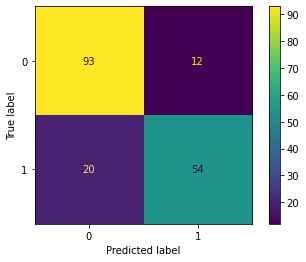

In [53]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [54]:
models.append({
    "type": "SVM",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## AdaBoost

In [55]:
param_grid = {
    'model__n_estimators': np.arange(1, 50, 1),
    'model__learning_rate': np.arange(0.01, 0.7, 0.05)
}

train_score, model = grid_search(AdaBoostClassifier(random_state=42), param_grid, x_train, y_train)

Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Training: 0.8371 AdaBoostClassifier(learning_rate=0.36000000000000004, n_estimators=22,
                   random_state=42)


Evaluation: 0.8212 AdaBoostClassifier(learning_rate=0.36000000000000004, n_estimators=22,
                   random_state=42)


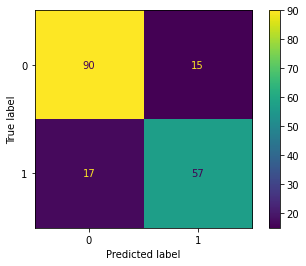

In [56]:
val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

In [57]:
models.append({
    "type": "AdaBoost",
    "model": model,
    "val_score": val_score,
    "train_score": train_score
})

## Models

In [58]:
models.sort(key=lambda x: x['val_score'], reverse=True)
pd.DataFrame(models)

,type,model,val_score,train_score
0,RandomForest,"(DecisionTreeClassifier(max_depth=4, max_featu...",0.821229,0.839890
1,GradientBoosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.821229,0.838491
2,SVM,"SVC(C=0.46, gamma=0.46, random_state=42)",0.821229,0.842677
3,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.821229,0.837063
4,KNN,KNeighborsClassifier(n_neighbors=26),0.815642,0.841278
5,LogisticRegression,"LogisticRegression(C=0.010000000000000002, ran...",0.815642,0.793529


In [59]:
possible_voting_estimators = list(map(lambda x: (x['type'], x['model']), models))
possible_voting_estimator_combinations = list(itertools.combinations(possible_voting_estimators, 1)) + \
                                        list(itertools.combinations(possible_voting_estimators, 3)) + \
                                        list(itertools.combinations(possible_voting_estimators, 5))

for estimators in possible_voting_estimator_combinations:
    print(list(map(lambda x: x[0], estimators)))

['RandomForest']
['GradientBoosting']
['SVM']
['AdaBoost']
['KNN']
['LogisticRegression']
['RandomForest', 'GradientBoosting', 'SVM']
['RandomForest', 'GradientBoosting', 'AdaBoost']
['RandomForest', 'GradientBoosting', 'KNN']
['RandomForest', 'GradientBoosting', 'LogisticRegression']
['RandomForest', 'SVM', 'AdaBoost']
['RandomForest', 'SVM', 'KNN']
['RandomForest', 'SVM', 'LogisticRegression']
['RandomForest', 'AdaBoost', 'KNN']
['RandomForest', 'AdaBoost', 'LogisticRegression']
['RandomForest', 'KNN', 'LogisticRegression']
['GradientBoosting', 'SVM', 'AdaBoost']
['GradientBoosting', 'SVM', 'KNN']
['GradientBoosting', 'SVM', 'LogisticRegression']
['GradientBoosting', 'AdaBoost', 'KNN']
['GradientBoosting', 'AdaBoost', 'LogisticRegression']
['GradientBoosting', 'KNN', 'LogisticRegression']
['SVM', 'AdaBoost', 'KNN']
['SVM', 'AdaBoost', 'LogisticRegression']
['SVM', 'KNN', 'LogisticRegression']
['AdaBoost', 'KNN', 'LogisticRegression']
['RandomForest', 'GradientBoosting', 'SVM', 'AdaBo

# Final Ensemble Classification

In [60]:
param_grid = {
    'model__estimators': possible_voting_estimator_combinations
}

train_score, model = grid_search(VotingClassifier(estimators=[]), param_grid, x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Training: 0.8483 VotingClassifier(estimators=(('GradientBoosting',
                              GradientBoostingClassifier(learning_rate=0.5499999999999999,
                                                         n_estimators=9,
                                                         random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=26)),
                             ('LogisticRegression',
                              LogisticRegression(C=0.010000000000000002,
                                                 random_state=42))))


Evaluation: 0.8268 VotingClassifier(estimators=[('vote1',
                              VotingClassifier(estimators=[('RandomForest',
                                                            RandomForestClassifier(max_depth=4,
                                                                                   n_estimators=43,
                                                                                   random_state=42))])),
                             ('vote2',
                              VotingClassifier(estimators=[('RandomForest',
                                                            RandomForestClassifier(max_depth=6,
                                                                                   n_estimators=33,
                                                                                   random_state=42)),
                                                           ('SVM',
                                                            SVC(C=0.38,
             

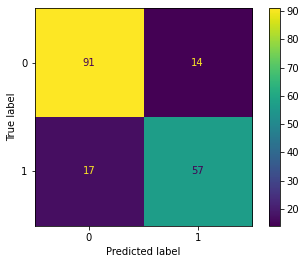

In [61]:
model = VotingClassifier(estimators=[
    ("vote1", VotingClassifier(estimators=[
                             ('RandomForest', RandomForestClassifier(max_depth=4, n_estimators=43, random_state=42))
    ])),
    ("vote2", VotingClassifier(estimators=[
                             ('RandomForest', RandomForestClassifier(max_depth=6, n_estimators=33, random_state=42)),
                             ('SVM', SVC(C=0.38, gamma=0.31000000000000005, random_state=42)),
                             ('LogisticRegression', LogisticRegression(C=0.1, random_state=42))
    ])),
    ("vote3", VotingClassifier(estimators=[
                             ('GradientBoosting', GradientBoostingClassifier(learning_rate=0.5499999999999999, n_estimators=9, random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=26)),
                             ('LogisticRegression', LogisticRegression(C=0.010000000000000002, random_state=42))
    ]))
])

val_score, model = evaluate(model, x_train, y_train, x_val, y_val)
confusion_matrix(model, x_train, y_train, x_val, y_val)

# Get Testset Predictions

In [62]:
y_test_pred = get_test_predictions(model, x_train, y_train, x_test)

x_passenger_ids["Survived"] = y_test_pred
x_passenger_ids['Survived'].value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [63]:
x_passenger_ids.to_csv(f"submission.csv", index=False)